In [21]:
##importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,roc_curve, roc_auc_score)
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
##Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns = data.feature_names)
y = data.target

In [19]:
## train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size= 0.2, random_state=42)


In [22]:
## feature scailing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [23]:
## finding best k
accuracy =[]
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    accuracy.append(acc)


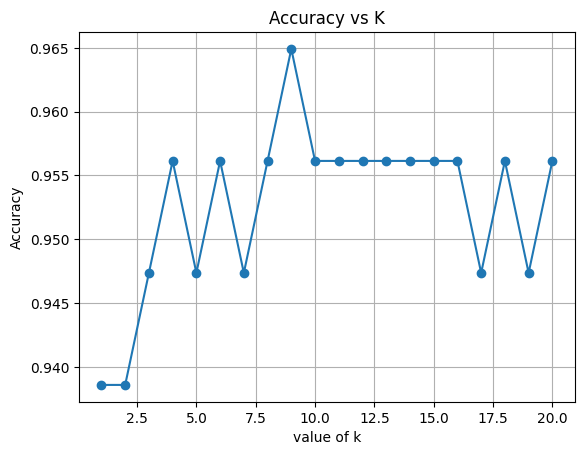

In [31]:
## graph to find best k
plt.plot(range(1,21),accuracy,marker='o')
plt.xlabel("value of k")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K")
plt.grid()
plt.show()


In [33]:
## finding best k
best_k = range(1,21)[accuracy.index(max(accuracy))]
print(f"Best k is {best_k}")
print(f"Best accuracy",max(accuracy))

Best k is 9
Best accuracy 0.9649122807017544


In [34]:
## training data
knn2 = KNeighborsClassifier(n_neighbors=best_k)
knn2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [35]:
## final prediction
y_pred2 = knn2.predict(X_test)

In [38]:
## Evaluation
print(f"Accuracy score : {accuracy_score(y_test,y_pred2)}")
print(f"Confusion matrix : {confusion_matrix(y_test,y_pred2)}")
print(f"classification_report{classification_report(y_test,y_pred2)}")

Accuracy score : 0.9649122807017544
Confusion matrix : [[41  2]
 [ 2 69]]
classification_report              precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



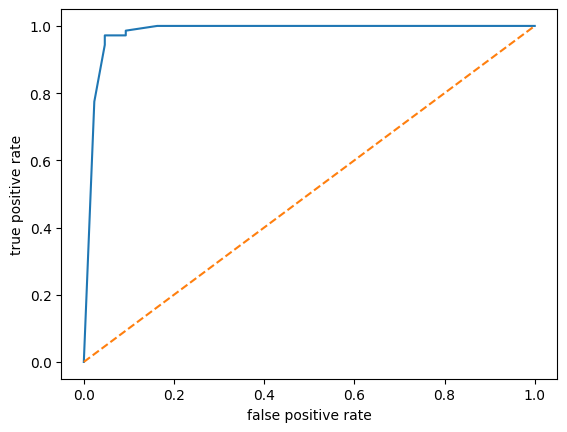

In [49]:
## ROC CURVE
y_prob = knn2.predict_proba(X_test)[:,1]
fpr,tpr,_= roc_curve(y_test,y_prob)
auc = roc_auc_score(y_test,y_prob)
plt.plot(fpr, tpr, label=f"AUc : {auc:.2f}")
plt.plot([0,1],[0,1],linestyle="--")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")

plt.show()